In [ ]:
#importing libraries
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import re
import math
from scipy import stats
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder






#Loading the datasets
cwur = pd.read_csv('/content/drive/MyDrive/SML Project /cwurData.csv')
shan = pd.read_csv('/content/drive/MyDrive/SML Project /shanghaiData.csv')
times = pd.read_csv('/content/drive/MyDrive/SML Project /timesData.csv')
edu_exp = pd.read_csv('/content/drive/MyDrive/SML Project /education_expenditure_supplementary_data.csv', engine ='python')
edu_att = pd.read_csv('/content/drive/MyDrive/SML Project /educational_attainment_supplementary_data.csv')

def rank_midpoint(rank_range):
    start = 0
    rank = re.sub('=', '', rank_range)
    rank = rank.split('-')
    for r in rank:
        r = float(r)
        start = r + start
    rank_length = len(rank)
    return start/rank_length

shan['world_rank_clean'] = shan['world_rank'].apply(rank_midpoint)
times['world_rank_clean'] = times['world_rank'].apply(rank_midpoint)
times.dtypes
shan.dtypes

world_rank           object
university_name      object
national_rank        object
total_score         float64
alumni              float64
award               float64
hici                float64
ns                  float64
pub                 float64
pcp                 float64
year                  int64
world_rank_clean    float64
dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#DataCleaning
#For Education Expenditure Supplementary Data
#replacing nan values with the mean of the respective columns
edu_exp['1995'].fillna(int(edu_exp['1995'].mean()),inplace=True)
edu_exp['2000'].fillna(int(edu_exp['2000'].mean()),inplace=True)
edu_exp['2005'].fillna(int(edu_exp['2005'].mean()),inplace=True)
edu_exp['2009'].fillna(int(edu_exp['2009'].mean()),inplace=True)
edu_exp['2010'].fillna(int(edu_exp['2010'].mean()),inplace=True)
edu_exp['2011'].fillna(int(edu_exp['2011'].mean()),inplace=True)
edu_exp

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,2.0
...,...,...,...,...,...,...,...,...,...
328,Turkey,Higher Education Institutions,Total,3.0,3.0,3.0,3.0,3.0,2.0
329,United Kingdom,Higher Education Institutions,Total,3.0,3.0,3.0,3.0,3.0,1.2
330,United States,Higher Education Institutions,Total,3.0,3.0,3.0,3.0,3.0,2.7
331,Brazil,Higher Education Institutions,Total,3.0,3.0,3.0,3.0,3.0,2.0


In [ ]:
#Data cleaning for Educational Attainment Supplementry Data
#replacing nan values with the mean of the respevtive columns

edu_att['1985'].fillna(int(edu_att['1985'].mean()),inplace=True)
edu_att['1986'].fillna(int(edu_att['1986'].mean()),inplace=True)
edu_att['1987'].fillna(int(edu_att['1987'].mean()),inplace=True)
edu_att['1990'].fillna(int(edu_att['1990'].mean()),inplace=True)
edu_att['1991'].fillna(int(edu_att['1991'].mean()),inplace=True)
edu_att['1992'].fillna(int(edu_att['1992'].mean()),inplace=True)
edu_att['1992'].fillna(int(edu_att['1992'].mean()),inplace=True)
edu_att['1993'].fillna(int(edu_att['1993'].mean()),inplace=True)
edu_att['1995'].fillna(int(edu_att['1995'].mean()),inplace=True)
edu_att['1996'].fillna(int(edu_att['1996'].mean()),inplace=True)
edu_att['1998'].fillna(int(edu_att['1998'].mean()),inplace=True)
edu_att['1999'].fillna(int(edu_att['1999'].mean()),inplace=True)
edu_att['2000'].fillna(int(edu_att['2000'].mean()),inplace=True)
edu_att['2001'].fillna(int(edu_att['2001'].mean()),inplace=True)
edu_att['2002'].fillna(int(edu_att['2002'].mean()),inplace=True)
edu_att['2003'].fillna(int(edu_att['2003'].mean()),inplace=True)
edu_att['2004'].fillna(int(edu_att['2004'].mean()),inplace=True)
edu_att['2005'].fillna(int(edu_att['2005'].mean()),inplace=True)
edu_att['2006'].fillna(int(edu_att['2006'].mean()),inplace=True)
edu_att['2007'].fillna(int(edu_att['2007'].mean()),inplace=True)
edu_att['2008'].fillna(int(edu_att['2008'].mean()),inplace=True)
edu_att['2009'].fillna(int(edu_att['2009'].mean()),inplace=True)
edu_att['2010'].fillna(int(edu_att['2010'].mean()),inplace=True)
edu_att['2011'].fillna(int(edu_att['2011'].mean()),inplace=True)
edu_att['2012'].fillna(int(edu_att['2012'].mean()),inplace=True)
edu_att['2013'].fillna(int(edu_att['2013'].mean()),inplace=True)

#Handling float to integer case differently
edu_att['1997'].fillna('0', inplace = True)
edu_att['2015'].fillna('0', inplace = True)

edu_att

,country_name,series_name,1985,1986,1987,1990,1991,1992,1993,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2015
0,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.33,6.0,1.0,0.44,7.0,5.0,6.0,0.57,7.0,0,8.0,10.0,0.75,16.0,16.0,19.0,11.0,0.86,13.0,16.0,14.0,17.0,1.27,20.0,19.0,23.0,0
1,Afghanistan,"Barro-Lee: Average years of primary schooling,...",1.03,6.0,1.0,1.26,7.0,5.0,6.0,1.54,7.0,0,8.0,10.0,2.01,16.0,16.0,19.0,11.0,2.18,13.0,16.0,14.0,17.0,2.64,20.0,19.0,23.0,0
2,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.83,6.0,1.0,0.95,7.0,5.0,6.0,1.26,7.0,0,8.0,10.0,1.92,16.0,16.0,19.0,11.0,1.01,13.0,16.0,14.0,17.0,2.45,20.0,19.0,23.0,0
3,Afghanistan,"Barro-Lee: Average years of primary schooling,...",2.34,6.0,1.0,2.22,7.0,5.0,6.0,2.37,7.0,0,8.0,10.0,3.83,16.0,16.0,19.0,11.0,2.26,13.0,16.0,14.0,17.0,3.55,20.0,19.0,23.0,0
4,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.54,6.0,1.0,0.92,7.0,5.0,6.0,0.94,7.0,0,8.0,10.0,1.26,16.0,16.0,19.0,11.0,2.00,13.0,16.0,14.0,17.0,1.29,20.0,19.0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79050,NaN,NaN,253.00,6.0,1.0,280.00,7.0,5.0,6.0,306.00,7.0,0,8.0,10.0,334.00,16.0,16.0,19.0,11.0,363.00,13.0,16.0,14.0,17.0,386.00,20.0,19.0,23.0,0
79051,NaN,NaN,253.00,6.0,1.0,280.00,7.0,5.0,6.0,306.00,7.0,0,8.0,10.0,334.00,16.0,16.0,19.0,11.0,363.00,13.0,16.0,14.0,17.0,386.00,20.0,19.0,23.0,0
79052,NaN,NaN,253.00,6.0,1.0,280.00,7.0,5.0,6.0,306.00,7.0,0,8.0,10.0,334.00,16.0,16.0,19.0,11.0,363.00,13.0,16.0,14.0,17.0,386.00,20.0,19.0,23.0,0
79053,Data from database: Education Statistics: Educ...,NaN,253.00,6.0,1.0,280.00,7.0,5.0,6.0,306.00,7.0,0,8.0,10.0,334.00,16.0,16.0,19.0,11.0,363.00,13.0,16.0,14.0,17.0,386.00,20.0,19.0,23.0,0


### **Analysing the CWUR dataset**

In [ ]:
#Cleaning the CWUR dataset

#replacing broad impact with the mean of the original 
cwur['broad_impact'] = cwur['broad_impact'].fillna(0)
cwur.isnull().any()
cwur_copy = cwur.copy()
label_encoder = LabelEncoder()
cwur_copy['country'] = label_encoder.fit_transform(cwur_copy['country'])

#Deleting the columns institution and year since we wont be needing it
cwur_copy.drop('year', axis=1, inplace=True)
cwur_copy.drop('institution', axis=1, inplace=True)
cwur_copy.head()


,world_rank,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,1,54,1,7,9,1,1,1,1,0.0,5,100.00
1,2,54,2,9,17,3,12,4,4,0.0,1,91.67
2,3,54,3,17,11,5,4,2,2,0.0,15,89.50
3,4,57,1,10,24,4,16,16,11,0.0,50,86.17
4,5,54,4,2,29,7,37,22,22,0.0,18,85.21


In [ ]:
#Splitting the dataset for training and testing

std_scaler = StandardScaler()

y = cwur_copy['world_rank']
X = cwur_copy.drop('world_rank', axis=1)

X = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

In [ ]:
#Bubble plot for visualizing the CWUR dataset

cwur_bubble_plt = px.scatter(cwur, x = 'world_rank', y = 'score', size = 'influence', color = 'country', hover_name = 'institution', size_max=50)
cwur_bubble_plt.show()

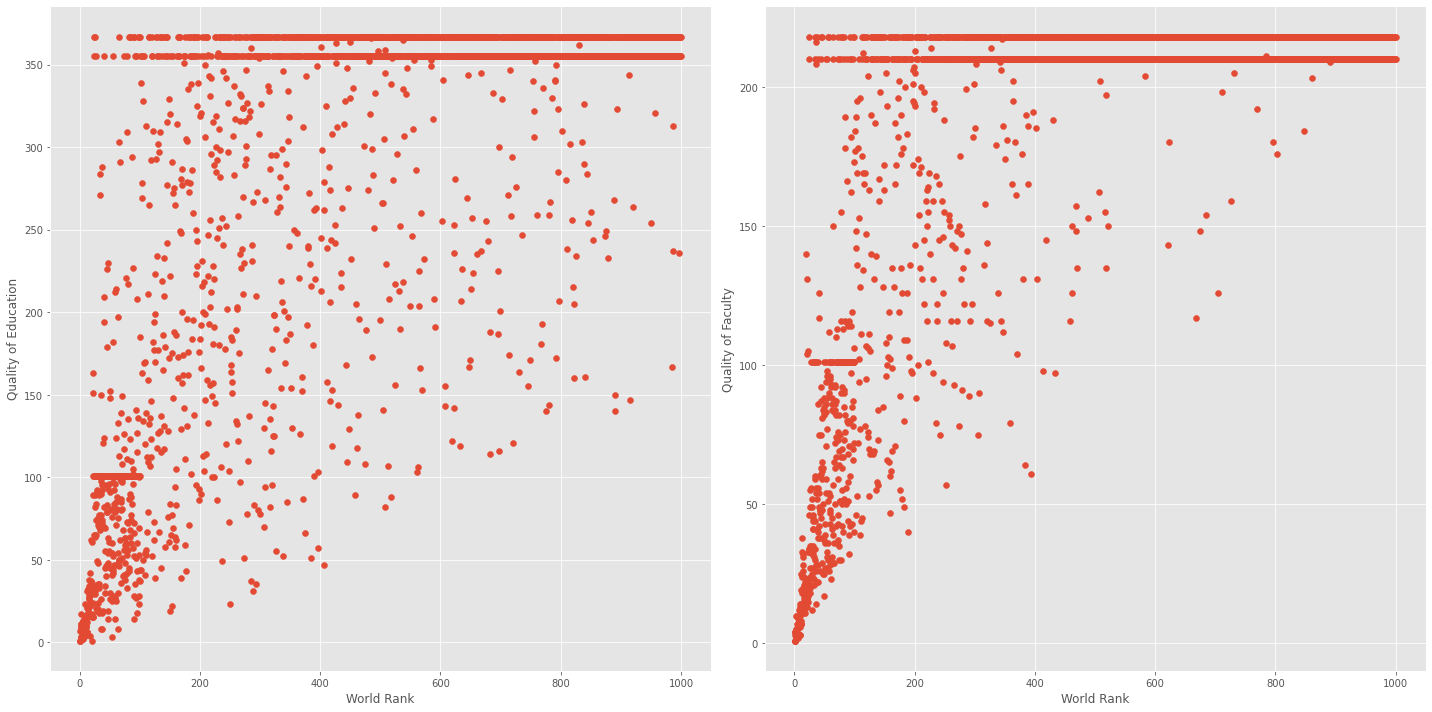

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(cwur['world_rank'], cwur['quality_of_education'])
plt.gcf().set_size_inches((20, 10))    
plt.xlabel("World Rank")
plt.ylabel("Quality of Education")

plt.subplot(1, 2, 2)
plt.scatter(cwur['world_rank'], cwur['quality_of_faculty'])
plt.gcf().set_size_inches((20, 10))    
plt.xlabel("World Rank")
plt.ylabel("Quality of Faculty")

plt.tight_layout()
plt.show() 


(2200, 14)


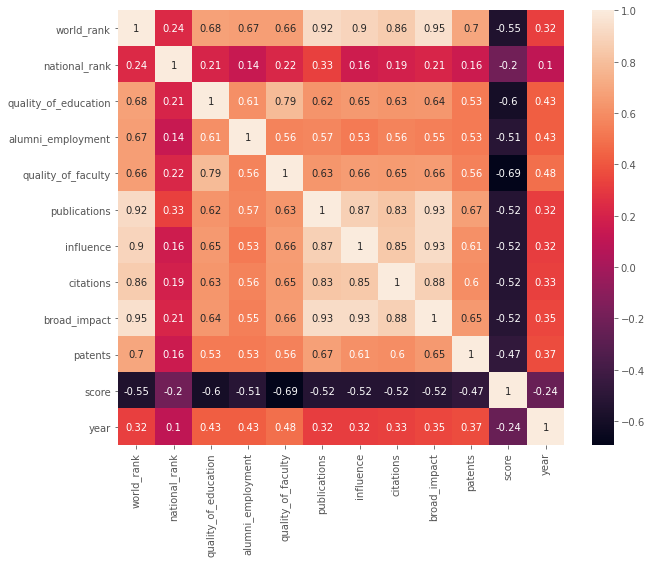

In [ ]:
#Correlation matrix for teh CWUR dataset
import seaborn as sns
import matplotlib.pyplot as plt

corre_mat = cwur.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corre_mat, annot = True, ax = ax)
 
df = pd.DataFrame(cwur)
print(df.shape)


Regression Algorithms on CWUR dataset

Algorithm 1:Bagging Regressor


In [ ]:
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor()
BR.fit(X_train,y_train)
print("The Bagging Regressor Score is: ", BR.score(X_test,y_test))
print()

BR_pred_y = BR.predict(X_test)

#We have to see if we require plots here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

B_R=pd.DataFrame(y_test)
B_R['Predicted_BR_cwur']=BR_pred_y
B_R['Difference_BR_cwur']=abs(y_test-BR_pred_y)
B_R

The Bagging Regressor Score is:  0.9972729726365942



,world_rank,Predicted_BR_cwur,Difference_BR_cwur
1124,925,926.9,1.9
235,36,36.1,0.1
585,386,394.5,8.5
1469,270,280.9,10.9
2066,867,860.8,6.2
...,...,...,...
67,68,68.5,0.5
1650,451,460.5,9.5
1635,436,449.7,13.7
379,180,174.1,5.9


Algorithm 2: Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)
print("The Gradient Boosting Regressor score is: ", GBR.score(X_test,y_test))
print()

GBR_pred_y = GBR.predict(X_test)

GB_R=pd.DataFrame(y_test)
GB_R['Predicted_GBR_cwur']=GBR_pred_y
GB_R['Difference_GBR_cwur']=abs(y_test-GBR_pred_y)
GB_R

The Gradient Boosting Regressor score is:  0.9973492725020618



,world_rank,Predicted_GBR_cwur,Difference_GBR_cwur
1124,925,922.341743,2.658257
235,36,66.625738,30.625738
585,386,390.125888,4.125888
1469,270,270.998974,0.998974
2066,867,860.240007,6.759993
...,...,...,...
67,68,60.794782,7.205218
1650,451,441.164734,9.835266
1635,436,417.906761,18.093239
379,180,174.719845,5.280155


Algorithm 3: Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso, Ridge

LR = Lasso()
LR.fit(X_train,y_train)
print("The Lasso Regression score is: ", LR.score(X_test,y_test))
print()

LR_pred_y = LR.predict(X_test)

L_R=pd.DataFrame(y_test)
L_R['Predicted_LR_cwur']=LR_pred_y
L_R['Difference_LR_cwur']=abs(y_test-LR_pred_y)
L_R

The Lasso Regression score is:  0.9420800320516742



,world_rank,Predicted_LR_cwur,Difference_LR_cwur
1124,925,852.127948,72.872052
235,36,205.766612,169.766612
585,386,385.113201,0.886799
1469,270,361.837875,91.837875
2066,867,836.164678,30.835322
...,...,...,...
67,68,9.131855,58.868145
1650,451,449.333476,1.666524
1635,436,421.226362,14.773638
379,180,166.250975,13.749025


Algorithm 4: Ridge Regression

In [ ]:
RR = Ridge()
RR.fit(X_train,y_train)
print("The Ridge Regression score is: ", RR.score(X_test,y_test))
print()

RR_pred_y = RR.predict(X_test)

R_R=pd.DataFrame(y_test)
R_R['Predicted_RR_cwur']=RR_pred_y
R_R['Difference_RR_cwur']=abs(y_test-RR_pred_y)
R_R

The Ridge Regression score is:  0.9424210988881928



,world_rank,Predicted_RR_cwur,Difference_RR_cwur
1124,925,856.786862,68.213138
235,36,193.359685,157.359685
585,386,383.178362,2.821638
1469,270,368.647258,98.647258
2066,867,837.030637,29.969363
...,...,...,...
67,68,14.347003,53.652997
1650,451,448.006680,2.993320
1635,436,418.572492,17.427508
379,180,157.569756,22.430244


Algorithm 5: Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
print("The Decision Tree Regressor score is: ", DTR.score(X_test,y_test))
print()

DTR_pred_y = DTR.predict(X_test)

DT_R=pd.DataFrame(y_test)
DT_R['Predicted_DTR_cwur']=DTR_pred_y
DT_R['Difference_DTR_cwur']=abs(y_test-DTR_pred_y)
DT_R

The Decision Tree Regressor score is:  0.9949308785987604



,world_rank,Predicted_DTR_cwur,Difference_DTR_cwur
1124,925,929.0,4.0
235,36,36.0,0.0
585,386,388.0,2.0
1469,270,271.0,1.0
2066,867,869.0,2.0
...,...,...,...
67,68,71.0,3.0
1650,451,454.0,3.0
1635,436,431.0,5.0
379,180,179.0,1.0


The final comparison between all the algorithms to pick the better one that predicts the rank accurately.

In [ ]:
rank_prediction = pd.concat([DT_R, (R_R.drop('world_rank', axis = 1)), (L_R.drop('world_rank', axis = 1)), (GB_R.drop('world_rank', axis = 1)), (B_R.drop('world_rank', axis = 1))], axis = 1)
rank_prediction
rank_prediction.drop(['Predicted_DTR_cwur', 'Predicted_RR_cwur', 'Predicted_LR_cwur', 'Predicted_GBR_cwur', 'Predicted_BR_cwur'], axis = 1)

,world_rank,Difference_DTR_cwur,Difference_RR_cwur,Difference_LR_cwur,Difference_GBR_cwur,Difference_BR_cwur
1124,925,4.0,68.213138,72.872052,2.658257,1.9
235,36,0.0,157.359685,169.766612,30.625738,0.1
585,386,2.0,2.821638,0.886799,4.125888,8.5
1469,270,1.0,98.647258,91.837875,0.998974,10.9
2066,867,2.0,29.969363,30.835322,6.759993,6.2
...,...,...,...,...,...,...
67,68,3.0,53.652997,58.868145,7.205218,0.5
1650,451,3.0,2.993320,1.666524,9.835266,9.5
1635,436,5.0,17.427508,14.773638,18.093239,13.7
379,180,1.0,22.430244,13.749025,5.280155,5.9


In [ ]:
#box plot for the above rank prediction for CWUR
import plotly.graph_objs as go
import plotly.express as px
world_r = go.Box(y = rank_prediction.world_rank,
                 name = 'world_rank_cwur',
                 marker = dict(color = 'rgba(12, 12, 140)')
)
pred_dtr = go.Box(y = rank_prediction.Predicted_DTR_cwur,
                 name = 'Predicted_DTR_cwur',
                 marker = dict(color = 'rgb(225, 12, 140)')
)
pred_lr= go.Box(y = rank_prediction.Predicted_LR_cwur,
                 name = 'Predicted_LR_cwur',
                 marker = dict(color = 'rgb(95, 192, 250)')
)
pred_rr= go.Box(y = rank_prediction.Predicted_RR_cwur,
                 name = 'Predicted_RR_cwur',
                 marker = dict(color = 'rgb(100, 64.7, 0)')
)
pred_gbr = go.Box(y = rank_prediction.Predicted_GBR_cwur,
                 name = 'Predicted_GBR_cwur',
                 marker = dict(color = 'rgb(95, 52, 20)')
)
pred_br = go.Box(y = rank_prediction.Predicted_BR_cwur,
                 name = 'Predicted_BR_cwur',
                 marker = dict(color = 'rgb(110, 72, 240)')
)

scat = [world_r, pred_dtr,pred_lr, pred_rr,pred_gbr,pred_br]
layout = dict(title = 'Box plot for World Rank vs Predicted Ranks(CWUR)', width = 800, height = 800)
fig = go.Figure(data = scat, layout = layout)
fig

## **Analysing the Times Dataset**

In [ ]:
#Cleaning the TIMES dataset

#replacing total score with the mean of the original after converting it to float data type
times['total_score'] = times['total_score'].replace('-', 0)
times["total_score"] = times.total_score.astype(float)
times['total_score'].fillna((times['total_score'].mean()),inplace=True)

In [ ]:
times['num_students']=times['num_students'].str.replace(',','')

In [ ]:
#replacing num_students with the mean of the original afer converting it to int data type

times['num_students'] = times['num_students'].fillna(0)
times['num_students'] = times.num_students.astype(int)
times['num_students'].fillna((times['num_students'].mean()),inplace=True)


#replaing student_staff_ratio with the mean of the original

times['student_staff_ratio'] = times['student_staff_ratio'].fillna(0)
times['student_staff_ratio'].fillna((times['student_staff_ratio'].mean()),inplace=True)

#replacing international_student NaN values with 0
times['international_students'] = times['international_students'].fillna(0)

#replacing female_male_ratio NaN values with 0
times['female_male_ratio'] = times['female_male_ratio'].fillna(0)

#replacing income with the mean of the original after converting it to float data type
times['income'] = times['income'].replace('-', 0)
times["income"] = times.total_score.astype(float)
times['total_score'].fillna((times['total_score'].mean()),inplace=True)

#replacing international with the mean of the original
times['international'] = times['international'].replace('-', 0)
times["international"] = times.international.astype(float)
times['international'].fillna((times['international'].mean()),inplace=True)


times_copy = times.copy()
label_encoder_times = LabelEncoder()
times_copy['country'] = label_encoder_times.fit_transform(times_copy['country'])


#Deleting the columns international_students, year, female_male_ratio, student_staff_ratio since we wont be needing it
times_copy.drop('year', axis=1, inplace=True)
times_copy.drop('international_students', axis=1, inplace=True)
times_copy.drop('female_male_ratio', axis=1, inplace=True)
times_copy.drop('student_staff_ratio', axis=1, inplace=True)
times_copy.drop('university_name', axis=1, inplace=True)
times_copy

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,world_rank_clean
0,1,70,99.7,72.4,98.7,98.8,96.1,96.1,20152,1.0
1,2,70,97.7,54.6,98.0,99.9,96.0,96.0,2243,2.0
2,3,70,97.8,82.3,91.4,99.9,95.6,95.6,11074,3.0
3,4,70,98.3,29.5,98.1,99.2,94.3,94.3,15596,4.0
4,5,70,90.9,70.3,95.4,99.9,94.2,94.2,7929,5.0
...,...,...,...,...,...,...,...,...,...,...
2598,601-800,58,18.6,24.3,10.9,26.5,0.0,0.0,21958,700.5
2599,601-800,64,14.5,14.9,7.6,19.3,0.0,0.0,31268,700.5
2600,601-800,29,24.0,16.1,10.2,36.4,0.0,0.0,4122,700.5
2601,601-800,29,20.1,23.3,16.0,13.5,0.0,0.0,10117,700.5


In [ ]:
#Splitting the dataset for training and testing

std_scaler_times = StandardScaler()

y_times = times_copy['world_rank_clean']
X_times = times_copy.drop(['world_rank', 'world_rank_clean'], axis=1)

X_times = pd.DataFrame(std_scaler_times.fit_transform(X_times), columns=X_times.columns)
X_train_times, X_test_times, y_train_times, y_test_times = train_test_split(X_times, y_times, train_size=0.8, random_state=101)

In [ ]:
#Bubble plot for visualizing the TIMES dataset

times_bubble_plt = px.scatter(times, x = 'world_rank', y = 'total_score', size = 'teaching', color = 'country', hover_name = 'university_name', size_max=50)
times_bubble_plt.show()

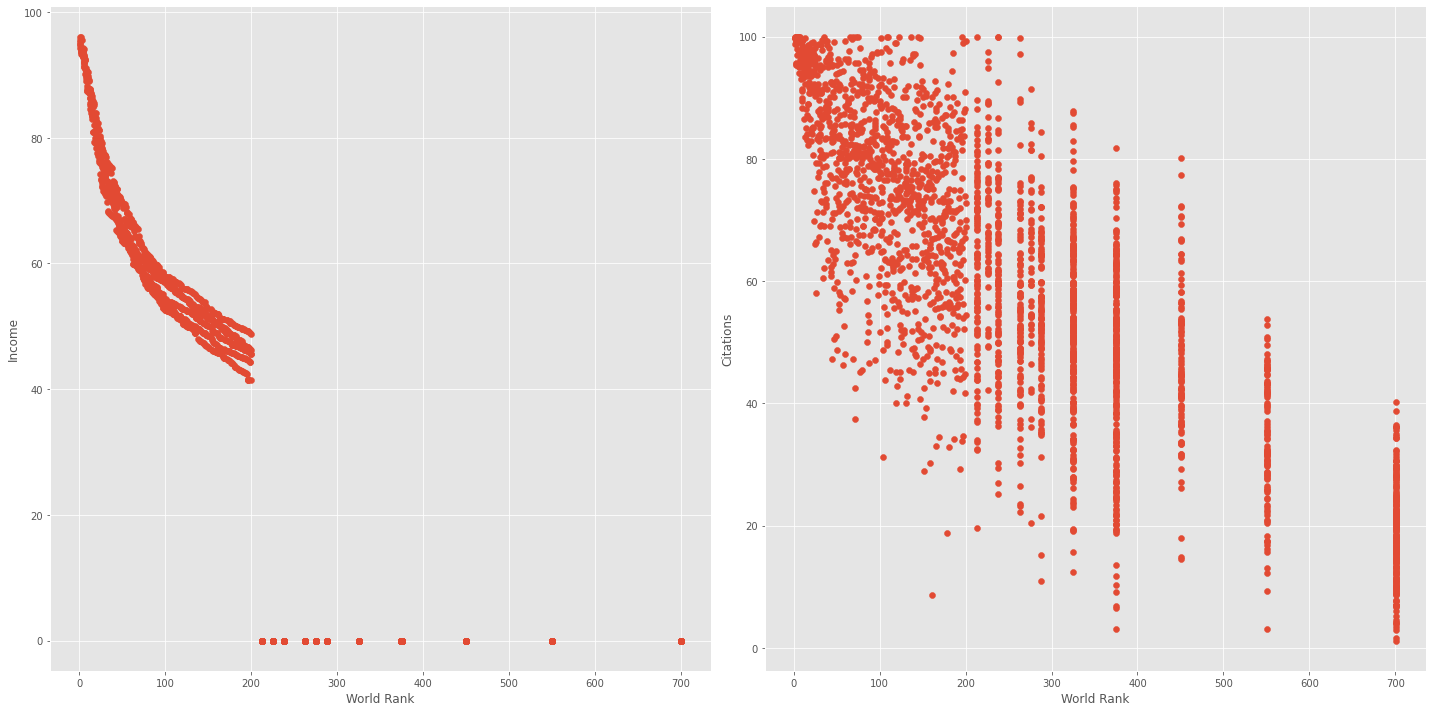

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(times['world_rank_clean'], times['income'])
plt.gcf().set_size_inches((20, 10))    
plt.xlabel("World Rank")
plt.ylabel("Income")

plt.subplot(1, 2, 2)
plt.scatter(times['world_rank_clean'], times['citations'])
plt.gcf().set_size_inches((20, 10))    
plt.xlabel("World Rank")
plt.ylabel("Citations")

plt.tight_layout()
plt.show() 


(2200, 14)


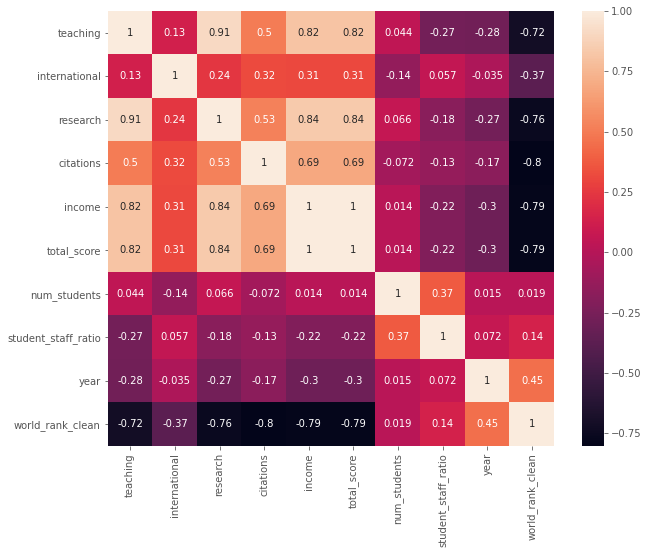

In [ ]:

#Correlation Matrix
times_corr = times
times_corr["world_rank_clean"] = times_corr.world_rank_clean.astype(float)
times_corr = times_corr.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(times_corr, annot = True, ax = ax)
print(df.shape)



Regression Algorithms on TIMES Dataset

Algorithm 1: Bagging Regressor

In [ ]:
times['world_rank_clean'] = times.world_rank_clean.astype(int)

In [ ]:
from sklearn.ensemble import BaggingRegressor
BR_times = BaggingRegressor()
BR_times.fit(X_train_times,y_train_times)
print("The Bagging Regressor Score is: ", BR_times.score(X_test_times,y_test_times))
print()

BR_pred_y_times = BR_times.predict(X_test_times)

#We have to see if we require plots here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

B_R_times=pd.DataFrame(y_test_times)
B_R_times['Predicted_BR_times']=BR_pred_y_times
y_test_times = y_test_times.astype(float)
B_R_times['Difference_BR_times']=abs(y_test_times-BR_pred_y_times)
B_R_times


The Bagging Regressor Score is:  0.9041244529626908



,world_rank_clean,Predicted_BR_times,Difference_BR_times
1494,93.0,104.50,11.50
1492,91.0,102.60,11.60
1828,26.0,20.30,5.70
4,5.0,3.50,1.50
2188,375.5,290.50,85.00
...,...,...,...
1825,23.0,20.90,2.10
51,52.0,50.30,1.70
612,11.0,9.40,1.60
1211,213.0,251.75,38.75


Algorithm 2: Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_times = GradientBoostingRegressor()
GBR_times.fit(X_train_times,y_train_times)
print("The Gradient Boosting Regressor score is: ", GBR_times.score(X_test_times,y_test_times))
print()

GBR_pred_y_times = GBR_times.predict(X_test_times)

GB_R_times=pd.DataFrame(y_test_times)
GB_R_times['Predicted_GBR_times']=GBR_pred_y_times
GB_R_times['Difference_GBR_times']=abs(y_test_times-GBR_pred_y_times)
GB_R_times

The Gradient Boosting Regressor score is:  0.9209814893502433



,world_rank_clean,Predicted_GBR_times,Difference_GBR_times
1494,93.0,107.459077,14.459077
1492,91.0,107.197457,16.197457
1828,26.0,21.685186,4.314814
4,5.0,10.591517,5.591517
2188,375.5,300.339667,75.160333
...,...,...,...
1825,23.0,17.956174,5.043826
51,52.0,54.373975,2.373975
612,11.0,12.039111,1.039111
1211,213.0,241.731346,28.731346


Algorithm 3: Lasso regression

In [ ]:
from sklearn.linear_model import Lasso, Ridge

LR_times = Lasso()
LR_times.fit(X_train_times,y_train_times)
print("The Lasso Regression score is: ", LR_times.score(X_test_times,y_test_times))
print()

LR_pred_y_times = LR_times.predict(X_test_times)

L_R_times=pd.DataFrame(y_test_times)
L_R_times['Predicted_LR_times']=LR_pred_y_times
L_R_times['Difference_LR_times']=abs(y_test_times-LR_pred_y_times)
L_R_times

The Lasso Regression score is:  0.7967274299883402



,world_rank_clean,Predicted_LR_times,Difference_LR_times
1494,93.0,139.745137,46.745137
1492,91.0,143.641246,52.641246
1828,26.0,-47.862419,73.862419
4,5.0,-169.145306,174.145306
2188,375.5,409.616846,34.116846
...,...,...,...
1825,23.0,-94.167214,117.167214
51,52.0,90.532250,38.532250
612,11.0,-127.948791,138.948791
1211,213.0,307.628457,94.628457


Algorithm 4: Ridge Regression 

In [ ]:
RR_times = Ridge()
RR_times.fit(X_train_times,y_train_times)
print("The Ridge Regression score is: ", RR_times.score(X_test_times,y_test_times))
print()

RR_pred_y_times = RR_times.predict(X_test_times)

R_R_times=pd.DataFrame(y_test_times)
R_R_times['Predicted_RR_times']=RR_pred_y_times
R_R_times['Difference_RR_times']=abs(y_test_times-RR_pred_y_times)
R_R_times

The Ridge Regression score is:  0.7967453029653802



,world_rank_clean,Predicted_RR_times,Difference_RR_times
1494,93.0,139.356079,46.356079
1492,91.0,146.473794,55.473794
1828,26.0,-49.891283,75.891283
4,5.0,-172.829647,177.829647
2188,375.5,408.781828,33.281828
...,...,...,...
1825,23.0,-97.469160,120.469160
51,52.0,92.354955,40.354955
612,11.0,-131.124997,142.124997
1211,213.0,306.921504,93.921504


Algorithm 5: Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR_times = DecisionTreeRegressor()
DTR_times.fit(X_train_times,y_train_times)
print("The Decision Tree Regressor score is: ", DTR_times.score(X_test_times,y_test_times))
print()

DTR_pred_y_times = DTR_times.predict(X_test_times)

DT_R_times=pd.DataFrame(y_test_times)
DT_R_times['Predicted_DTR_times']=DTR_pred_y_times
DT_R_times['Difference_DTR_times']=abs(y_test_times-DTR_pred_y_times)
DT_R_times

The Decision Tree Regressor score is:  0.8440514522605476



,world_rank_clean,Predicted_DTR_times,Difference_DTR_times
1494,93.0,87.0,6.0
1492,91.0,93.0,2.0
1828,26.0,19.0,7.0
4,5.0,3.0,2.0
2188,375.5,325.5,50.0
...,...,...,...
1825,23.0,22.0,1.0
51,52.0,53.0,1.0
612,11.0,10.0,1.0
1211,213.0,288.0,75.0


The final comparison between all the algorithms to pick the better one that predicts the rank accurately.

In [ ]:
rank_prediction_times = pd.concat([DT_R_times, (R_R_times.drop('world_rank_clean', axis = 1)), (L_R_times.drop('world_rank_clean', axis = 1)), (GB_R_times.drop('world_rank_clean', axis = 1)), (B_R_times.drop('world_rank_clean', axis = 1))], axis = 1)
rank_prediction_times
rank_prediction_times.drop(['Predicted_DTR_times', 'Predicted_RR_times', 'Predicted_LR_times', 'Predicted_GBR_times', 'Predicted_BR_times'], axis = 1)

,world_rank_clean,Difference_DTR_times,Difference_RR_times,Difference_LR_times,Difference_GBR_times,Difference_BR_times
1494,93.0,6.0,46.356079,46.745137,14.459077,11.50
1492,91.0,2.0,55.473794,52.641246,16.197457,11.60
1828,26.0,7.0,75.891283,73.862419,4.314814,5.70
4,5.0,2.0,177.829647,174.145306,5.591517,1.50
2188,375.5,50.0,33.281828,34.116846,75.160333,85.00
...,...,...,...,...,...,...
1825,23.0,1.0,120.469160,117.167214,5.043826,2.10
51,52.0,1.0,40.354955,38.532250,2.373975,1.70
612,11.0,1.0,142.124997,138.948791,1.039111,1.60
1211,213.0,75.0,93.921504,94.628457,28.731346,38.75


In [ ]:
#box plot for the above rank prediction for TIMES
import plotly.graph_objs as go
import plotly.express as px
world_r_times = go.Box(y = rank_prediction_times.world_rank_clean,
                 name = 'world_rank_times',
                 marker = dict(color = 'rgba(12, 12, 140)')
)
pred_dtr_times = go.Box(y = rank_prediction_times.Predicted_DTR_times,
                 name = 'Predicted_DTR_times',
                 marker = dict(color = 'rgb(225, 12, 140)')
)
pred_lr_times= go.Box(y = rank_prediction_times.Predicted_LR_times,
                 name = 'Predicted_LR_times',
                 marker = dict(color = 'rgb(95, 192, 250)')
)
pred_rr_times= go.Box(y = rank_prediction_times.Predicted_RR_times,
                 name = 'Predicted_RR_times',
                 marker = dict(color = 'rgb(100, 64.7, 0)')
)
pred_gbr_times = go.Box(y = rank_prediction_times.Predicted_GBR_times,
                 name = 'Predicted_GBR_times',
                 marker = dict(color = 'rgb(95, 52, 20)')
)
pred_br_times = go.Box(y = rank_prediction_times.Predicted_BR_times,
                 name = 'Predicted_BR_times',
                 marker = dict(color = 'rgb(110, 72, 240)')
)

scat = [world_r_times, pred_dtr_times,pred_lr_times, pred_rr_times, pred_gbr_times,pred_br_times]
layout = dict(title = 'Box plot for World Rank vs Predicted Ranks(TIMES)', width = 800, height = 800)
fig = go.Figure(data = scat, layout = layout)
fig

#**Analysing the Shanghai Datatset**

In [ ]:
#Cleaning the SHANGHAI dataset

#Cleaning the national_rank column by replacing rank_ranges with mid point 
shan["national_rank"] = shan.national_rank.astype(str)
shan['national_rank_clean'] = shan['national_rank'].apply(rank_midpoint)

#Replacing total score with the mean of the original after converting it to float data type
shan['total_score'] = shan['total_score'].replace('-', 0.0)
shan["total_score"] = shan.total_score.astype(float)
shan['total_score'].fillna((shan['total_score'].mean()),inplace=True)

#Replacing alumni with the mean of the original
shan['alumni'] = shan['alumni'].replace('-', 0.0)
shan['alumni'].fillna((shan['alumni'].mean()),inplace=True)

#Replacing award with the mean of the original
shan['award'] = shan['award'].replace('-', 0.0)
shan['award'].fillna((shan['award'].mean()),inplace=True)

#Replacing hici with the mean of the original
shan['hici'] = shan['hici'].replace('-', 0.0)
shan['hici'].fillna((shan['hici'].mean()),inplace=True)

#Replacing ns with the mean of the original
shan['ns'] = shan['ns'].replace('-', 0.0)
shan['ns'].fillna((shan['ns'].mean()),inplace=True)

#Replacing pub with the mean of the original
shan['pub'] = shan['pub'].replace('-', 0.0)
shan['pub'].fillna((shan['pub'].mean()),inplace=True)

#Replacing pcp with the mean of the original
shan['pcp'] = shan['pcp'].replace('-', 0.0)
shan['pcp'].fillna((shan['pcp'].mean()),inplace=True)

#Replacing national_rank_clean with the mean of the original
shan['national_rank_clean'].fillna((shan['national_rank_clean'].mean()),inplace=True)

# shan_copy = shan.copy()
# label_encoder_shan = LabelEncoder()
# shan_copy['country'] = label_encoder_shan.fit_transform(shan_copy['country'])

#Deleting the columns year, national_rank, university_name since we wont be needing it
shan_copy = shan.copy()
shan_copy.drop('year', axis=1, inplace=True)
shan_copy.drop('national_rank', axis=1, inplace=True)
shan_copy.drop('university_name', axis=1, inplace=True)


In [ ]:
#Splitting the dataset for training and testing

std_scaler_shan = StandardScaler()

y_shan = shan_copy['world_rank_clean']
X_shan = shan_copy.drop(['world_rank', 'world_rank_clean'], axis=1)

X_shan = pd.DataFrame(std_scaler_shan.fit_transform(X_shan), columns=X_shan.columns)
X_train_shan, X_test_shan, y_train_shan, y_test_shan = train_test_split(X_shan, y_shan, train_size=0.8, random_state=101)

In [ ]:
#Bubble plot for visualizing the SHANGHAI dataset

shan_bubble_plt = px.scatter(shan, x = 'world_rank_clean', y = 'total_score', size = 'award', color = 'alumni', hover_name = 'university_name', size_max=50)
times_bubble_plt.show()

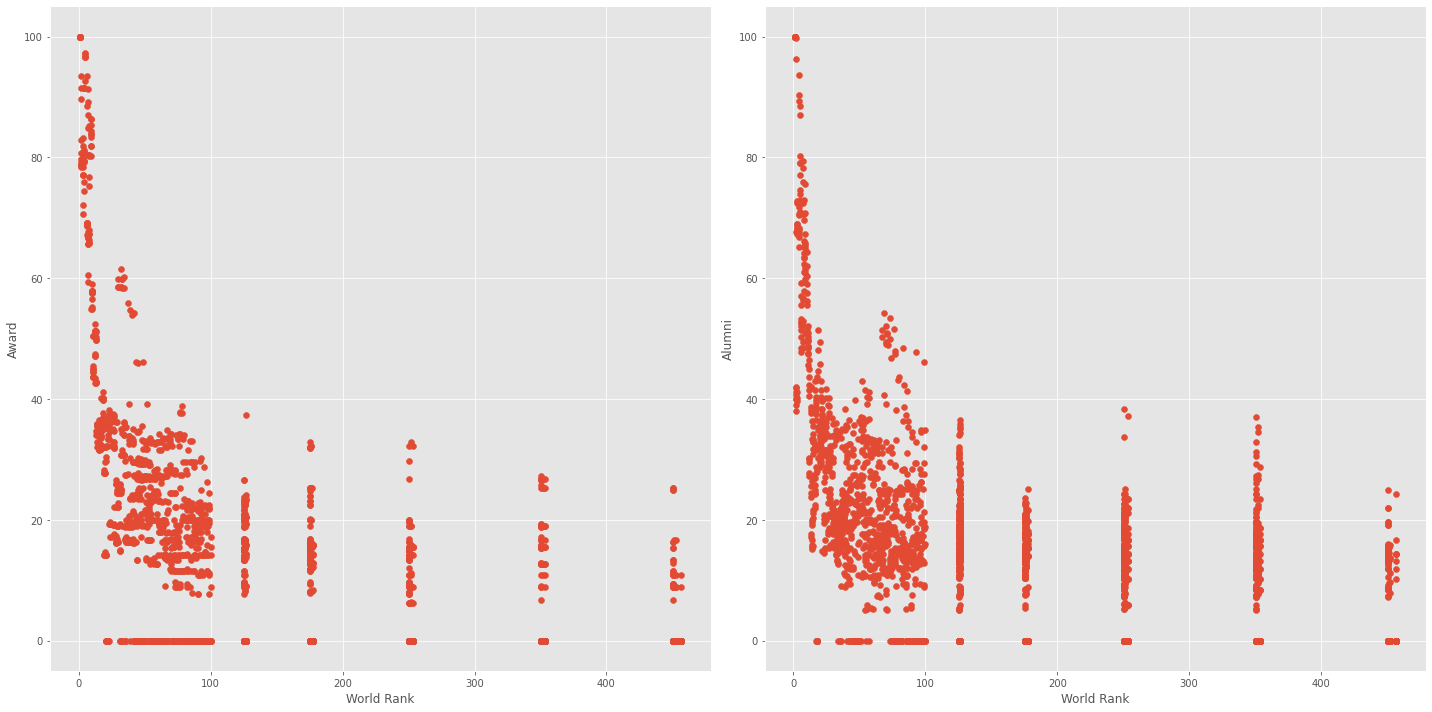

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(shan['world_rank_clean'], shan['award'])
plt.gcf().set_size_inches((20, 10))    
plt.xlabel("World Rank")
plt.ylabel("Award")

plt.subplot(1, 2, 2)
plt.scatter(shan['world_rank_clean'], shan['alumni'])
plt.gcf().set_size_inches((20, 10))    
plt.xlabel("World Rank")
plt.ylabel("Alumni")

plt.tight_layout()
plt.show() 


(2200, 14)


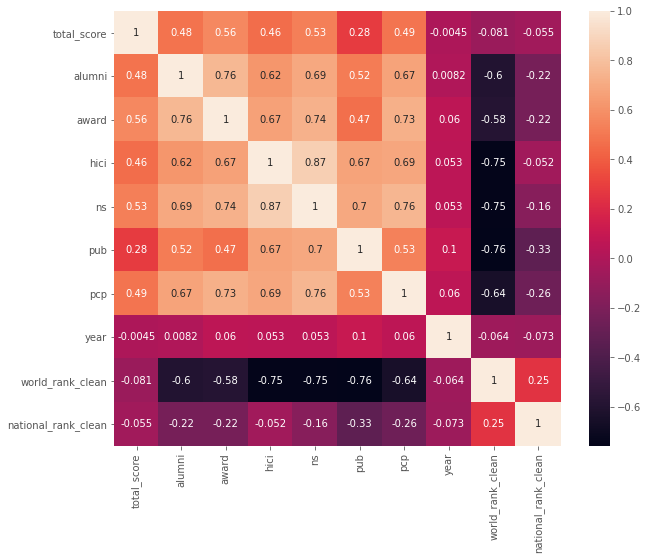

In [ ]:
#Correlation Matrix
shan_corr = shan
shan_corr["world_rank_clean"] = shan.world_rank_clean.astype(float)
shan = shan.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(shan_corr, annot = True, ax = ax)
print(df.shape)



Regression Algorithms on SHANGHAI Dataset

Algorithm 1: Bagging Regressor

In [ ]:
shan['world_rank_clean'] = shan.world_rank_clean.astype(int)

In [ ]:
from sklearn.ensemble import BaggingRegressor
BR_shan = BaggingRegressor()
BR_shan.fit(X_train_shan,y_train_shan)
print("The Bagging Regressor Score is: ", BR_shan.score(X_test_shan,y_test_shan))
print()

BR_pred_y_shan = BR_shan.predict(X_test_shan)

#We have to see if we require plots here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

B_R_shan=pd.DataFrame(y_test_shan)
B_R_shan['Predicted_BR_shan']=BR_pred_y_shan
y_test_shan = y_test_shan.astype(float)
B_R_shan['Difference_BR_shan']=abs(y_test_shan-BR_pred_y_shan)
B_R_shan.head(500)


The Bagging Regressor Score is:  0.9750575083662822



,world_rank_clean,Predicted_BR_shan,Difference_BR_shan
4575,175.5,168.15,7.35
167,177.5,206.30,28.80
1889,352.0,351.85,0.15
958,450.5,453.50,3.00
3010,450.5,451.00,0.50
...,...,...,...
4307,450.5,451.10,0.60
2220,251.5,260.80,9.30
56,57.0,57.60,0.60
834,350.5,360.50,10.00


Algorithm 2: Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_shan = GradientBoostingRegressor()
GBR_shan.fit(X_train_shan,y_train_shan)
print("The Gradient Boosting Regressor score is: ", GBR_shan.score(X_test_shan,y_test_shan))
print()

GBR_pred_y_shan = GBR_shan.predict(X_test_shan)

GB_R_shan=pd.DataFrame(y_test_shan)
GB_R_shan['Predicted_GBR_shan']=GBR_pred_y_shan
GB_R_shan['Difference_GBR_shan']=abs(y_test_shan-GBR_pred_y_shan)
GB_R_shan

The Gradient Boosting Regressor score is:  0.9673549723031081



,world_rank_clean,Predicted_GBR_shan,Difference_GBR_shan
4575,175.5,162.759052,12.740948
167,177.5,206.183963,28.683963
1889,352.0,364.311966,12.311966
958,450.5,460.979780,10.479780
3010,450.5,461.524827,11.024827
...,...,...,...
1320,353.5,306.572828,46.927172
3902,6.0,12.694813,6.694813
3540,27.0,21.579512,5.420488
2753,250.5,294.854424,44.354424


Algorithm 3: Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso, Ridge

LR_shan = Lasso()
LR_shan.fit(X_train_shan,y_train_shan)
print("The Lasso Regression score is: ", LR_shan.score(X_test_shan,y_test_shan))
print()

LR_pred_y_shan = LR_shan.predict(X_test_shan)

L_R_shan=pd.DataFrame(y_test_shan)
L_R_shan['Predicted_LR_shan']=LR_pred_y_shan
L_R_shan['Difference_LR_shan']=abs(y_test_shan-LR_pred_y_shan)
L_R_shan

The Lasso Regression score is:  0.8387122250591164



,world_rank_clean,Predicted_LR_shan,Difference_LR_shan
4575,175.5,269.267179,93.767179
167,177.5,280.001611,102.501611
1889,352.0,341.596314,10.403686
958,450.5,388.270965,62.229035
3010,450.5,373.767205,76.732795
...,...,...,...
1320,353.5,320.809596,32.690404
3902,6.0,22.221352,16.221352
3540,27.0,28.422987,1.422987
2753,250.5,304.653122,54.153122


Algorithm 4: Ridge Regression

In [ ]:
RR_shan = Ridge()
RR_shan.fit(X_train_shan,y_train_shan)
print("The Ridge Regression score is: ", RR_shan.score(X_test_shan,y_test_shan))
print()

RR_pred_y_shan = RR_shan.predict(X_test_shan)

R_R_shan=pd.DataFrame(y_test_shan)
R_R_shan['Predicted_RR_shan']=RR_pred_y_shan
R_R_shan['Difference_RR_shan']=abs(y_test_shan-RR_pred_y_shan)
R_R_shan

The Ridge Regression score is:  0.8394435310341837



,world_rank_clean,Predicted_RR_shan,Difference_RR_shan
4575,175.5,269.461406,93.961406
167,177.5,279.375371,101.875371
1889,352.0,344.082898,7.917102
958,450.5,392.154318,58.345682
3010,450.5,375.532084,74.967916
...,...,...,...
1320,353.5,321.603131,31.896869
3902,6.0,20.484129,14.484129
3540,27.0,25.741265,1.258735
2753,250.5,305.789121,55.289121


Algorithm 5: Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR_shan = DecisionTreeRegressor()
DTR_shan.fit(X_train_shan,y_train_shan)
print("The Decision Tree Regressor score is: ", DTR_shan.score(X_test_shan,y_test_shan))
print()

DTR_pred_y_shan = DTR_shan.predict(X_test_shan)

DT_R_shan=pd.DataFrame(y_test_shan)
DT_R_shan['Predicted_DTR_shan']=DTR_pred_y_shan
DT_R_shan['Difference_DTR_shan']=abs(y_test_shan-DTR_pred_y_shan)
DT_R_shan

The Decision Tree Regressor score is:  0.9469464116566094



,world_rank_clean,Predicted_DTR_shan,Difference_DTR_shan
4575,175.5,125.5,50.0
167,177.5,176.5,1.0
1889,352.0,352.0,0.0
958,450.5,450.5,0.0
3010,450.5,451.5,1.0
...,...,...,...
1320,353.5,352.0,1.5
3902,6.0,6.0,0.0
3540,27.0,28.0,1.0
2753,250.5,352.0,101.5


The final comparison between all the algorithms to pick the better one that predicts the rank accurately.

In [ ]:
rank_prediction_shan = pd.concat([DT_R_shan, (R_R_shan.drop('world_rank_clean', axis = 1)), (L_R_shan.drop('world_rank_clean', axis = 1)), (GB_R_shan.drop('world_rank_clean', axis = 1)), (B_R_shan.drop('world_rank_clean', axis = 1))], axis = 1)
rank_prediction_shan
rank_prediction_shan.drop(['Predicted_DTR_shan', 'Predicted_RR_shan', 'Predicted_LR_shan', 'Predicted_GBR_shan', 'Predicted_BR_shan'], axis = 1)

,world_rank_clean,Difference_DTR_shan,Difference_RR_shan,Difference_LR_shan,Difference_GBR_shan,Difference_BR_shan
4575,175.5,50.0,93.961406,93.767179,12.740948,7.35
167,177.5,1.0,101.875371,102.501611,28.683963,28.80
1889,352.0,0.0,7.917102,10.403686,12.311966,0.15
958,450.5,0.0,58.345682,62.229035,10.479780,3.00
3010,450.5,1.0,74.967916,76.732795,11.024827,0.50
...,...,...,...,...,...,...
1320,353.5,1.5,31.896869,32.690404,46.927172,12.60
3902,6.0,0.0,14.484129,16.221352,6.694813,0.40
3540,27.0,1.0,1.258735,1.422987,5.420488,0.40
2753,250.5,101.5,55.289121,54.153122,44.354424,10.30


In [ ]:
#box plot for the above rank prediction for SHANGHAI
import plotly.graph_objs as go
import plotly.express as px
world_r_shan = go.Box(y = rank_prediction_shan.world_rank_clean,
                 name = 'world_rank_shan',
                 marker = dict(color = 'rgba(12, 12, 140)')
)
pred_dtr_shan = go.Box(y = rank_prediction_shan.Predicted_DTR_shan,
                 name = 'Predicted_DTR_shan',
                 marker = dict(color = 'rgb(225, 12, 140)')
)
pred_lr_shan= go.Box(y = rank_prediction_shan.Predicted_LR_shan,
                 name = 'Predicted_LR_shan',
                 marker = dict(color = 'rgb(95, 192, 250)')
)
pred_rr_shan= go.Box(y = rank_prediction_shan.Predicted_RR_shan,
                 name = 'Predicted_RR_shan',
                 marker = dict(color = 'rgb(100, 64.7, 0)')
)
pred_gbr_shan = go.Box(y = rank_prediction_shan.Predicted_GBR_shan,
                 name = 'Predicted_GBR_shan',
                 marker = dict(color = 'rgb(95, 52, 20)')
)
pred_br_shan = go.Box(y = rank_prediction_shan.Predicted_BR_shan,
                 name = 'Predicted_BR_shan',
                 marker = dict(color = 'rgb(110, 72, 240)')
)

scat = [world_r_shan, pred_dtr_shan,pred_lr_shan, pred_rr_shan, pred_gbr_shan,pred_br_shan]
layout = dict(title = 'Box plot for World Rank vs Predicted Ranks(SHANGHAI)', width = 800, height = 800)
fig = go.Figure(data = scat, layout = layout)
fig